In [ ]:
!pip install --upgrade librosa
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 20.2 MB/s 
  Attempting uninstall: librosa
    Found existing installation: librosa 0.8.1
    Uninstalling librosa-0.8.1:
      Successfully uninstalled librosa-0.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.6 MB/s 
     |████████████████████████████████| 51 kB 4.6 MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591955 sha256=2e2d2a3827a9d22daa6d68029780912e2ad6efeced0709869b9763f3dc964281
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667ce39d52100f837835ea18fa
Successfully built pretty-midi


In [ ]:
import librosa
import librosa.display
import numpy as np
import os
import statistics 
import matplotlib.pyplot as plt

In [ ]:
#funcion para normalizar los espectrogramas 
def batch(iterable, n):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]
def normal(stat, feature_matrix):
    return np.nan_to_num((feature_matrix - stat['mean']) / stat['std'])
def normal2(matrix):
    aux  = matrix.T
    print("Normalizing...")
    for idx in batch(np.arange(aux.shape[0]), 1000):
        aux[idx, :] = normal(stat , aux[idx, :])
    return aux

In [ ]:
#Ejemplo de un espectrograma de la nota G3, forte de compas y medio
#Los parámetros de las funciones se obtuvieron del github
aux,sr = librosa.core.load('drive/MyDrive/Data train/MAPS_ISOL_NO_F_S0_M55_AkPnBcht.wav',sr=44100, mono=True)
X= np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
plt.figure(figsize=(16, 8))
plt.imshow(X, aspect="auto")

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: ignored

In [ ]:
#En los archivos de texto se tiene en que segundo empieza y termina la nota
f=open('drive/MyDrive/Data train/MAPS_ISOL_NO_F_S0_M55_AkPnBcht.txt','r') 
L=f.readlines()
f.close()
k = float(L[1].split()[0])
j = float(L[1].split()[1])
print(k,j)
k=librosa.time_to_frames(k, sr=sr)
j=librosa.time_to_frames(j, sr=sr)
print(k,j)

0.500004 2.50001


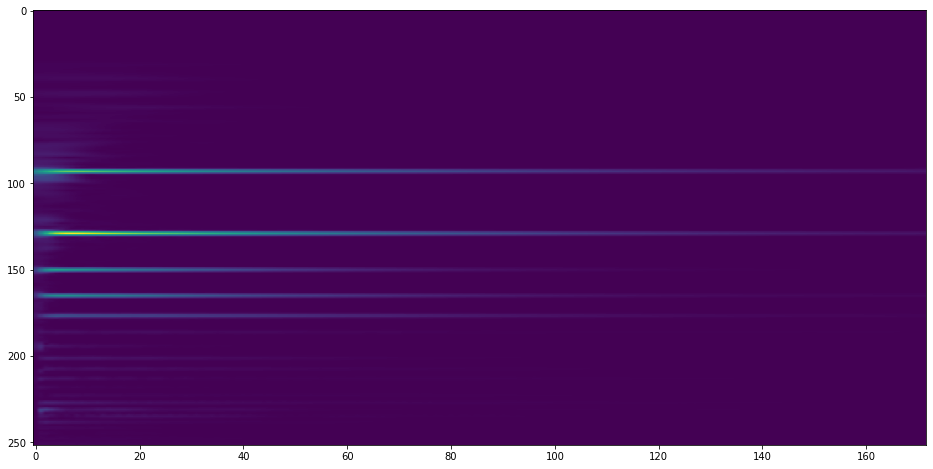

In [ ]:
plt.figure(figsize=(16, 8))
plt.imshow(X[:,k:j], aspect="auto")

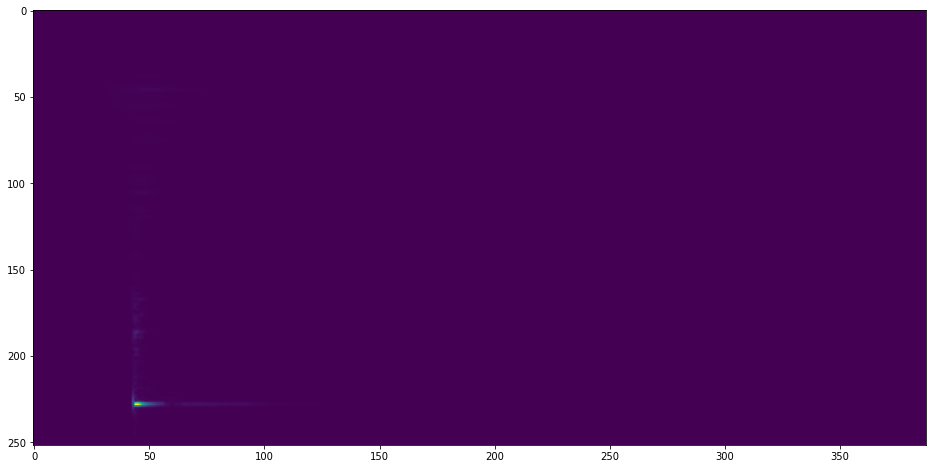

In [ ]:
#Ejemplo de espectrograma de la nota E7, forte de compas y medio 
#Las notas mas altas, aunque tengan la misma duración deja de ser audibles mas rapido
aux,sr = librosa.core.load('drive/MyDrive/Data train/MAPS_ISOL_NO_F_S0_M100_AkPnBcht.wav',sr=44100, mono=True)
X= np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
plt.figure(figsize=(16, 8))
plt.imshow(X, aspect="auto")

In [ ]:
#En los archivos de texto se tiene en que segundo empieza y termina la nota
f=open('drive/MyDrive/Data train/MAPS_ISOL_NO_F_S0_M100_AkPnBcht.txt','r') 
L=f.readlines()
f.close()
k = float(L[1].split()[0])
j = float(L[1].split()[1])
print(k,j)
k=librosa.time_to_frames(k, sr=sr)
j=librosa.time_to_frames(j, sr=sr)
print(k,j)

0.500004 2.50001
43 215


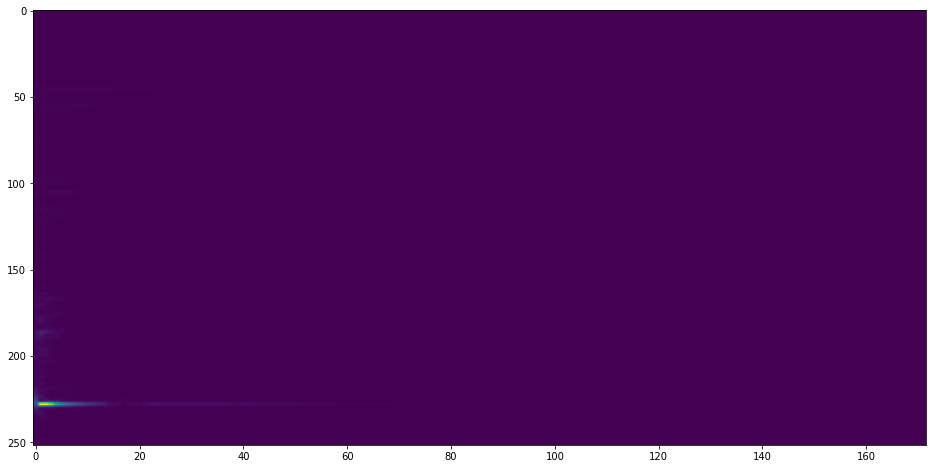

In [ ]:
#Se tomaron solo el primer medio segundo 
plt.figure(figsize=(16, 8))
plt.imshow(X[:,k:j], aspect="auto")

In [ ]:
#Se guardan los nombres de los archivos
l = os.listdir('drive/MyDrive/Data train')

In [ ]:
#Se guardan en una lista los nombres te los archivos txt
lis=[]
for arch in l:
  if arch.endswith('.txt'):
    lis.append(arch)

In [ ]:
#Se lee el primer archivo txt
sr=44100
f=open('drive/MyDrive/Data train/'+lis[0],'r') 
L=f.readlines()
f.close()
#Se guarda el segundo en donde inicia y termina la nota 
k = float(L[1].split()[0])
l = float(L[1].split()[1])
#Se guarda los freams donde se inicia y terminan
k=librosa.time_to_frames(k, sr=sr)
l=librosa.time_to_frames(l, sr=sr)
#Se genera una matriz con la longitud de las notas de un piano estandar
y=np.zeros((l-k,88))

#Se recorren las notas que se utilizaron
for j in range(1,len(L)):
  #Se guarda la posicion de la nota (respecto al piano)
  c = int(L[j].split()[2])-21
  #Se enciende la nota en la matriz
  for m in range(y.shape[0]):
    y[m][c]=1

#Se abre el archivo de audio 
aux,sr = librosa.core.load('drive/MyDrive/Data train/'+lis[0].replace('.txt','.wav'),sr=sr, mono=True)
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
X_test=X_test.T
#Se guarda el primer medio segundo
x=X_test[k:l]

In [ ]:
#Se guarda todos los audios
for i in range(1,len(lis)):
    f=open('drive/MyDrive/Data train/'+lis[i],'r') 
    L=f.readlines()
    f.close()
    k = float(L[1].split()[0])
    l = float(L[1].split()[1])
    k=librosa.time_to_frames(k, sr=sr)
    l=librosa.time_to_frames(l, sr=sr)
    y2 = np.zeros((l-k,88))
    for j in range(1,len(L)):
        c = int(L[j].split()[2])-21
        for m in range(y2.shape[0]):
            y2[m][c]=1
    y = np.concatenate((y,y2))
    aux,sr = librosa.core.load('drive/MyDrive/Data train/'+lis[i].replace('.txt','.wav'),sr=44100, mono=True)
    X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
    X_test=X_test.T
    x2=X_test[k:l]
    x = np.concatenate((x,x2))

In [ ]:
#Se guarda el espectrograma de una melodía
aux,sr = librosa.core.load('drive/MyDrive/MUS/MAPS_MUS-bach_846_AkPnBchtx2.wav',sr=44100, mono=True)
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
X_test=X_test.T

In [ ]:
#Para cargar los parametros usados en el github
#stat = dict()
#stat['mean'] = np.loadtxt('drive/MyDrive/mean_stat.txt' , delimiter = ',')
#stat['std'] = np.loadtxt('drive/MyDrive/std_stat.txt' , delimiter = ',')

In [ ]:
#Se guarda los parámetros de los espectrogramas
stat = dict()
stat['mean'] =np.mean(x,axis=0)
stat['std'] = np.std(x,axis=0)

In [ ]:
#Se normalizan los datos y la melodía de prueba
x = normal2(x.T)
X_test = normal2(X_test.T)

Normalizing...


In [ ]:
#Se guardan las matrices y los parámetros
import numpy as np
np.save('x_value.npy', x)
np.save('y_value.npy', y)
np.save('X_test_value.npy', X_test)
np.save('x_mean.npy', np.mean(x,axis=0))
np.save('x_std.npy', np.std(x,axis=0))

In [ ]:
#Dado que una dependencia de librosa necesita una vercion desactualizada de numpy
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Se cargan los datos 
import numpy as np
x = np.load('drive/MyDrive/Resultados/x_value.npy')
y = np.load('drive/MyDrive/Resultados/y_value.npy')
X_test = np.load('drive/MyDrive/Resultados/X_test_value.npy')

In [ ]:
import torch
# Usamos cuda
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
#Enlistamos los espectrogramas y las notas
X=[]
Y=[]
for i in range(x.shape[0]):
    X.append(torch.from_numpy(x[i]).float())
    Y.append(torch.from_numpy(y[i]).float())

In [ ]:
#Se genera el dataset
from torch.utils.data import Dataset

class EsDataset(Dataset):
    def __init__(self):
        self.samples = X
        self.labels = Y

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx], self.labels[idx]
dataset = EsDataset()

In [ ]:
#Se hacen los batchs
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch.optim as optim
import statistics 
import torch.nn as nn

In [ ]:
#Modelo

class create_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(252, 500)
        self.BatN1   = nn.BatchNorm1d(500)
        self.linear2 = nn.Linear(500, 250)
        self.BatN2   = nn.BatchNorm1d(250)
        self.linear3 = nn.Linear(250, 88)
        self.Drop   = nn.Dropout(0.3)
        self.ReLU   = nn.ReLU()
        self.Sig     = nn.Sigmoid()
        
        
    def forward(self, x): 
        x = self.linear1(x)
        x = self.ReLU(x)
        x = self.Drop(x)
        x = self.BatN1(x)
        x = self.linear2(x)
        x = self.ReLU(x)
        x = self.Drop(x)
        x = self.BatN2(x)
        x = self.linear3(x)
        x = self.Sig(x)
        return x

In [ ]:
def make_train_step(model, loss_fn, optimizer):
  
    def train_step(x, y):
        model.train()
        yhat = model(x)
        optimizer.zero_grad()
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        return loss.item()

    return train_step

In [ ]:
# Construye un modelo
model = create_model().to(device)

# Establece los hyper-parametros
lr = 1e-2
n_epochs = 100

# Define la función de perdida y optimización
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.BCELoss()

# listas para guardar la perdida
losses_mean = []

# Crea funciones para realizar el paso de entrenamiento del modelo, perdida y optimizador
train_step = make_train_step(model, loss_fn, optimizer)

# Bucle de entrenamiento
for epoch in range(n_epochs):

    losses = []
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.float()
        y_batch = y_batch.float()
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        loss = train_step(x_batch, y_batch)
        losses.append(loss)
    losses_mean.append(statistics.mean(losses))

        
    if (epoch +1) % 1  == 0:
        print(f"[{epoch+1}] Training loss: {statistics.mean(losses):.3f}")

In [ ]:
#Se carga el modelo ya entrenado
model = create_model().to(device)
model.load_state_dict(torch.load('drive/MyDrive/Resultados/model'))
model.eval()

create_model(
  (linear1): Linear(in_features=252, out_features=500, bias=True)
  (BatN1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=500, out_features=250, bias=True)
  (BatN2): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=250, out_features=88, bias=True)
  (Drop): Dropout(p=0.3, inplace=False)
  (ReLU): ReLU()
  (Sig): Sigmoid()
)

In [ ]:
#Se introduce la melodía al modelo
X_testt=torch.from_numpy(X_test).float()
yhat = model(X_testt.to(device)).to('cpu')

In [ ]:
#Al parecer todos los datos son .5
np.mean(yhat.detach().numpy())

0.020806488

In [ ]:
#Los datos mayores a .5 se hacen 1 y los demás 0
Y_pred = 1.0 * ( yhat.detach().numpy() > 0.5)

In [ ]:
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


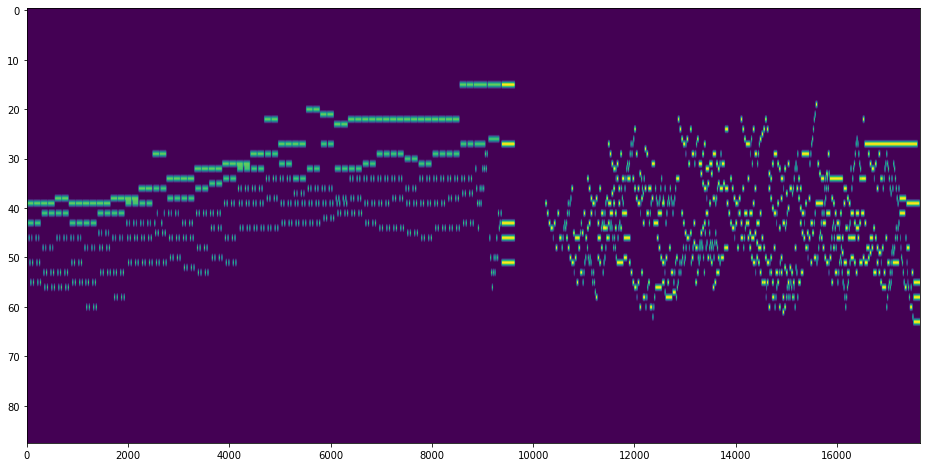

In [ ]:
#Partitura original 
import pretty_midi
pretty_midi.pretty_midi.MAX_TICK = 1e10
#Esta partitura se realizó a mano
mid_file = 'drive/MyDrive/MUS/MAPS_MUS-bach_846_AkPnBchtx2.mid'
f = pretty_midi.PrettyMIDI(midi_file= mid_file)
piano_roll = pretty_midi.PrettyMIDI.get_piano_roll(f , fs = 44100/512.0)
piano_roll = piano_roll[21:109 , :]
plt.figure(figsize=(16, 8))
plt.imshow(piano_roll, aspect="auto")

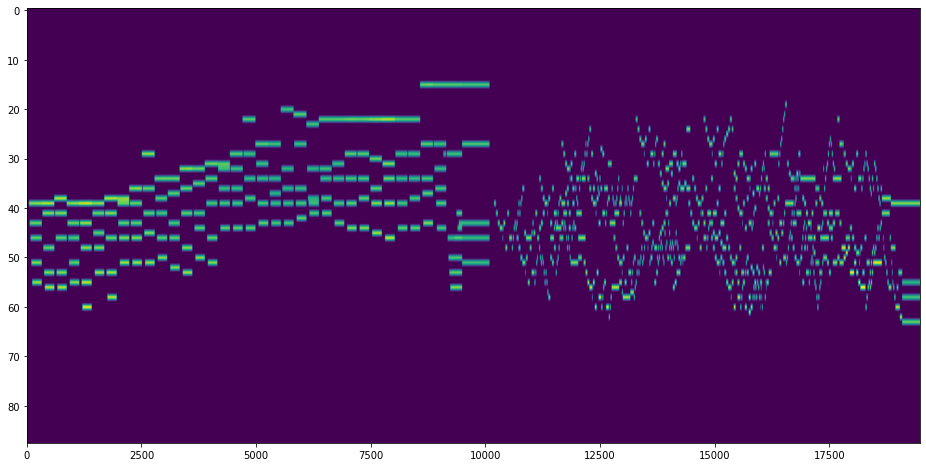

In [ ]:
#Esta partitura de la base de datos
mid_file = 'drive/MyDrive/MUS/MAPS_MUS-bach_846_AkPnBcht.mid'
f = pretty_midi.PrettyMIDI(midi_file= mid_file)
piano_roll = pretty_midi.PrettyMIDI.get_piano_roll(f , fs = 44100/512.0)
piano_roll = piano_roll[21:109 , :]
plt.figure(figsize=(16, 8))
plt.imshow(piano_roll, aspect="auto")

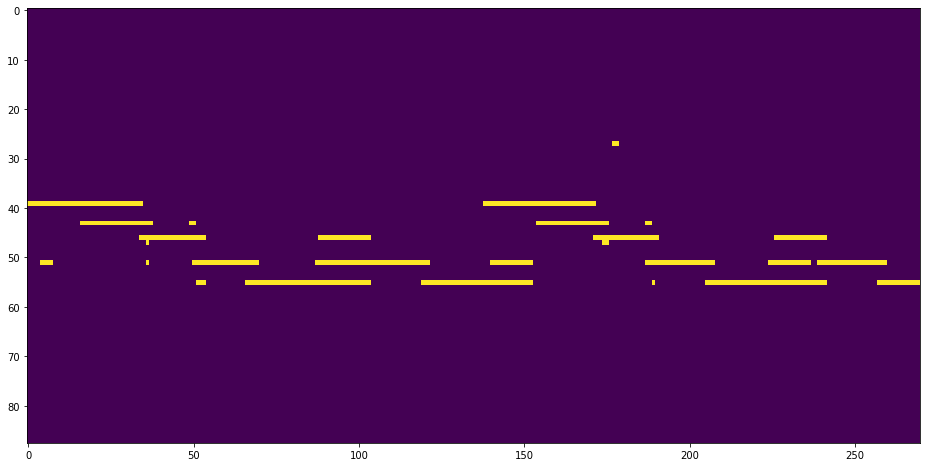

In [ ]:
import matplotlib.pyplot as plt
#Partituda predicha
plt.figure(figsize=(16, 8))
plt.imshow(Y_pred[:270].T, aspect="auto")

## Ahora considerando particiones temporales

In [ ]:
aux,sr = librosa.core.load('drive/MyDrive/Data train/MAPS_ISOL_NO_F_S0_M55_AkPnBcht.wav',sr=44100, mono=True)
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
X_test=X_test.T

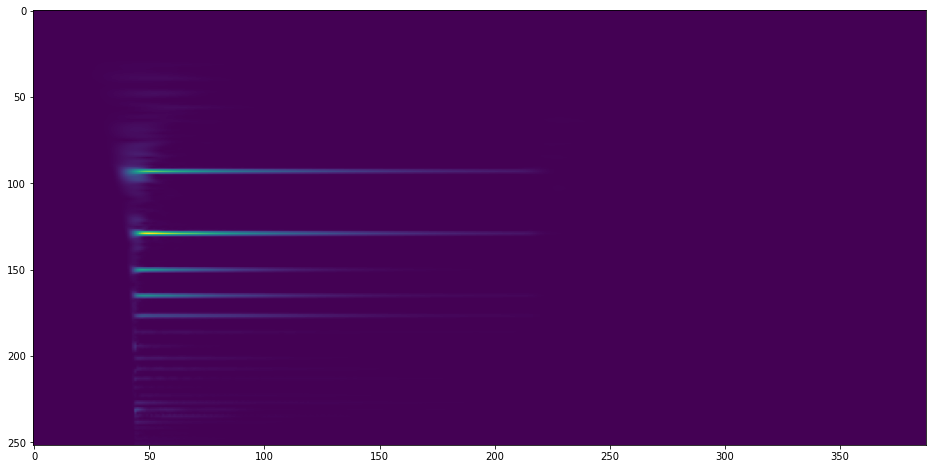

In [ ]:
plt.figure(figsize=(16, 8))
plt.imshow(X_test.T, aspect="auto")

In [ ]:
f=open('drive/MyDrive/Data train/MAPS_ISOL_NO_F_S0_M55_AkPnBcht.txt')
L=f.readlines()
f.close()
k = float(L[1].split()[0])
j = float(L[1].split()[1])
print(k,j)
k1=librosa.time_to_frames(k, sr=sr)
j1=librosa.time_to_frames(j, sr=sr)
print(k1,j1)

0.500004 2.50001
43 215


In [ ]:
sfpm=(j-k)/8
X_test=X_test[k1:j1]
x = np.zeros((8,252))
for i in range(8):
    x[i]=np.sum(X_test[librosa.time_to_frames(i*sfpm):min(librosa.time_to_frames((i+1)*sfpm),X_test.shape[0])],axis=0)/(min(librosa.time_to_frames((i+1)*sfpm),X_test.shape[0])-librosa.time_to_frames(i*sfpm))

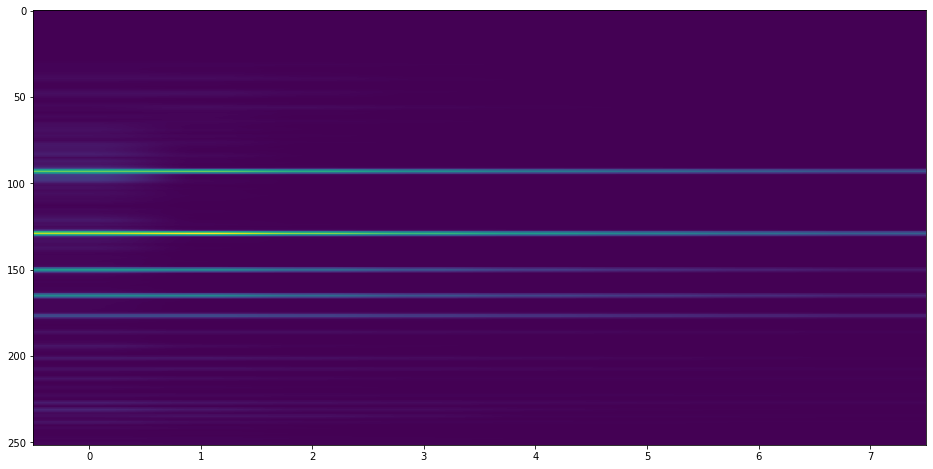

In [ ]:
plt.figure(figsize=(16, 8))
plt.imshow(x.T, aspect="auto")

In [ ]:
f=open('drive/MyDrive/Data train/'+lis[0],'r') 
L=f.readlines()
f.close()
k = float(L[1].split()[0])
j = float(L[1].split()[1])
y=np.zeros((8,88))
for j in range(1,len(L)):
    c = int(L[j].split()[2])-21
    for m in range(y.shape[0]):
        y[m][c]=1

        
aux,sr = librosa.core.load('Data train/'+lis[0].replace('.txt','.wav'),sr=44100, mono=True)
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))

sfpm=(j-k)/8
X_test=X_test.T
X_test=X_test[librosa.time_to_frames(k, sr=sr):librosa.time_to_frames(j, sr=sr)]

k = 0
j = librosa.time_to_frames(sfpm, sr=sr)
x = np.zeros((8,252))
x[0]=np.sum(X_test[k:j],axis=0)/j

for i in range(1,8):
    k = librosa.time_to_frames(sfpm*i, sr=sr)+1
    j = librosa.time_to_frames(sfpm*(i+1), sr=sr)
    x[i]=np.sum(X_test[k:min(j,X_test.shape[1])],axis=0)/(min(j,X_test.shape[1])-k)

In [ ]:
for i in range(1,len(lis)):
    f=open('drive/MyDrive/Data train/'+lis[i],'r') 
    L=f.readlines()
    f.close()
    k = float(L[1].split()[0])
    j = float(L[1].split()[1])
    y2 = np.zeros((8,88))
    for l in range(1,len(L)):
        c = int(L[l].split()[2])-21
        for m in range(y2.shape[0]):
            y2[m][c]=1
    y = np.concatenate((y,y2))
    
    aux,sr = librosa.core.load('Data train/'+lis[i].replace('.txt','.wav'),sr=44100, mono=True)
    X_ = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
    
    sfpm=(j-k)/8
    X_=X_.T
    X_=X_[librosa.time_to_frames(k, sr=sr):librosa.time_to_frames(j, sr=sr)]
    k = 0
    j = librosa.time_to_frames(sfpm, sr=sr)
    x2 = np.zeros((8,252))
    x2[0] = np.sum(X_[k:j],axis=0)/j
    for l in range(1,8):
        k = librosa.time_to_frames(sfpm*l, sr=sr)+1
        j = librosa.time_to_frames(sfpm*(l+1), sr=sr)
        x2[l]=np.sum(X_[k:min(j,X_.shape[1])],axis=0)/(min(j,X_.shape[1])-k)
    x = np.concatenate((x,x2))

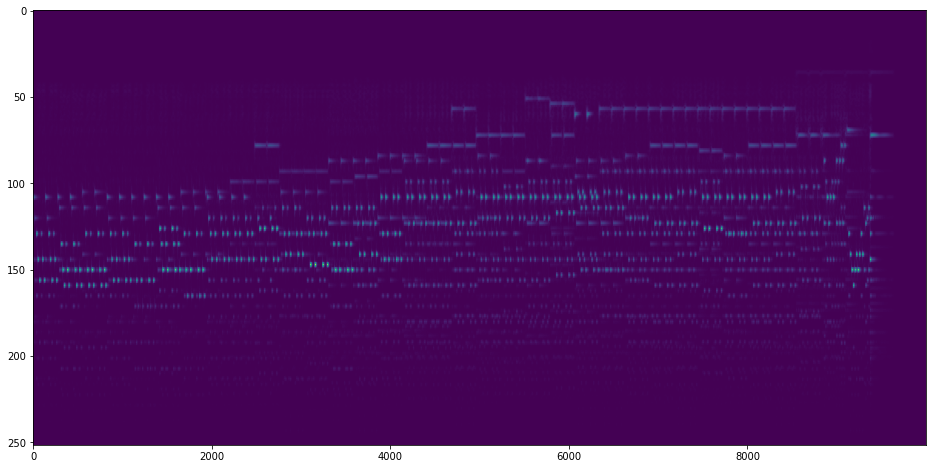

In [ ]:
aux,sr = librosa.core.load( 'drive/MyDrive/MUS/MAPS_MUS-bach_846_AkPnBchtx2.wav',sr=44100, mono=True)
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
plt.figure(figsize=(16, 8))
plt.imshow(X_test[:,:10000], aspect="auto")

In [ ]:
X_test=X_test[:,:10000]

In [ ]:
bpm=75
sfpm=((60/75)/8)
import math
X_roll=np.zeros((math.ceil(librosa.frames_to_time(X_test.shape[1],sr=sr)/sfpm),252))
k = 0
j = librosa.time_to_frames(sfpm, sr=sr)
X_roll[0]=np.sum(X_test[:,k:j],axis=1)/j
for i in range(1,X_roll.shape[0]):
    k = librosa.time_to_frames(sfpm*i, sr=sr)+1
    j = librosa.time_to_frames(sfpm*(i+1), sr=sr)
    X_roll[i]=np.sum(X_test[:,k:min(j,X_test.shape[1])],axis=1)/(min(j,X_test.shape[1])-k)

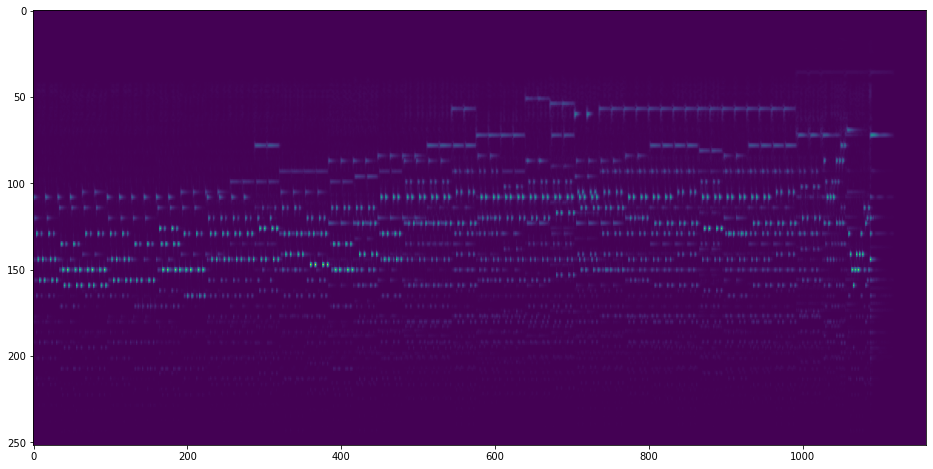

In [ ]:
plt.figure(figsize=(16, 8))
plt.imshow(X_roll.T, aspect="auto")

/usr/local/lib/python3.7/dist-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


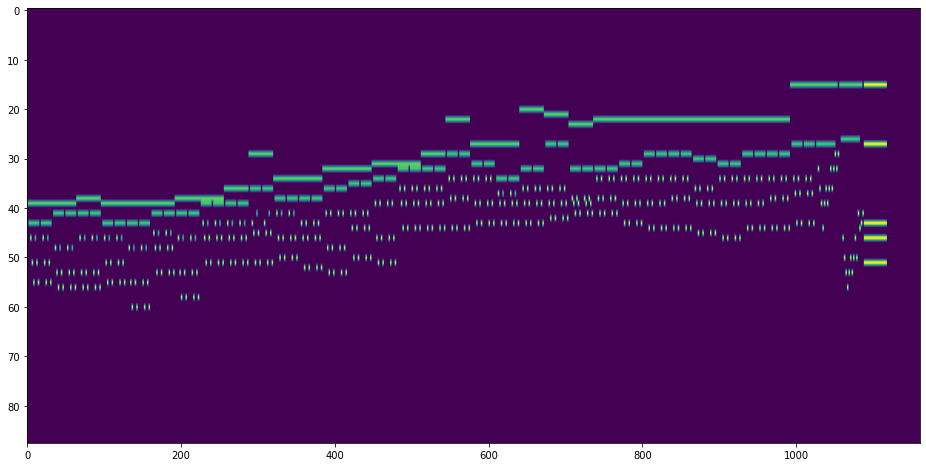

In [ ]:
import pretty_midi
pretty_midi.pretty_midi.MAX_TICK = 1e10
f = pretty_midi.PrettyMIDI(midi_file= "drive/MyDrive/MUS/MAPS_MUS-bach_846_AkPnBchtx2.mid")
piano_roll = np.zeros((math.ceil(librosa.frames_to_time(X_test.shape[1],sr=sr)/sfpm),88))
k=0
for i in range(f.get_piano_roll(20).shape[1]):
    if k >= 1161:
        break
    if i%4==0 or i%4==1:
        piano_roll[k]=f.get_piano_roll(20)[21:109,i]
        k=k+1 
plt.figure(figsize=(16, 8))
plt.imshow(piano_roll.T, aspect="auto")

In [ ]:
model = create_model().to(device)
model.load_state_dict(torch.load('drive/MyDrive/Resultados/Res Fusa/model'))
model.eval()

create_model(
  (linear1): Linear(in_features=252, out_features=500, bias=True)
  (BatN1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=500, out_features=250, bias=True)
  (BatN2): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=250, out_features=88, bias=True)
  (Drop): Dropout(p=0.3, inplace=False)
  (ReLU): ReLU()
  (Sig): Sigmoid()
)

In [ ]:
X_test = np.load('drive/MyDrive/Resultados/Res Fusa/X_test_value_norm.npy')
#Se introduce la melodía al modelo
X_testt=torch.from_numpy(X_test).float()
yhat = model(X_testt.to(device)).to('cpu')
#Los datos mayores a .5 se hacen 1 y los demás 0
Y_pred = 1.0 * ( yhat.detach().numpy() > 0.5)

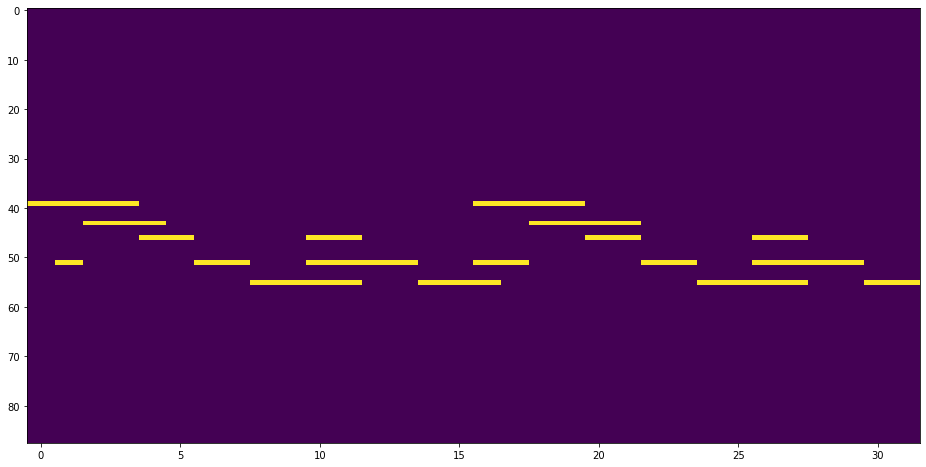

In [ ]:
plt.figure(figsize=(16, 8))
plt.imshow((Y_pred[:32].T), aspect="auto")

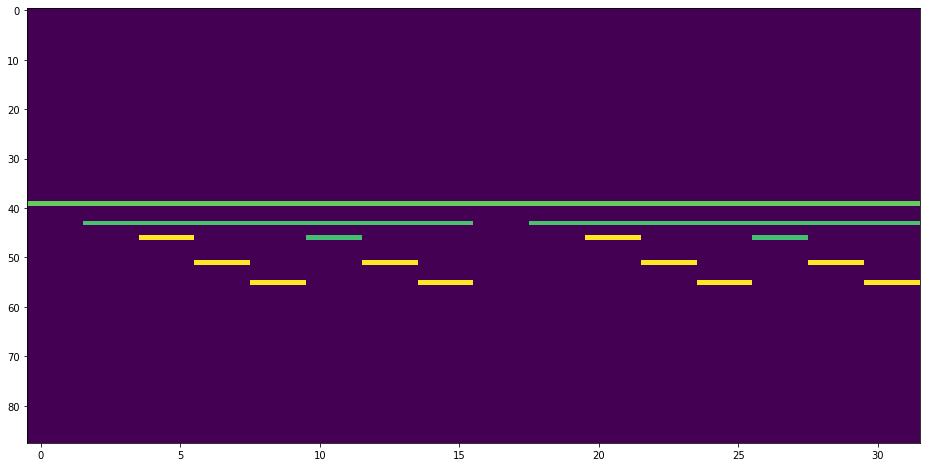

In [ ]:
Y_test = np.load('drive/MyDrive/Resultados/Res Fusa/Y_test_value.npy')
plt.figure(figsize=(16, 8))
plt.imshow((Y_test[:32].T), aspect="auto")